# Machine Learning Engineer Nanodegree
## Capstone Proposal
Elissa Backas
August 15, 2017

## Proposal


### Domain Background
"Breast is Best." (1) As a new mother, this has been drilled into my head by healthcare providers. books, family, friends, random people on the internet. Everyone knows now that breastmilk is the most nutrional choice for the first months of an infants life. However, despite this knowledge, many woman don't breastfeed for the reccommended 12 months or longer. There have been many studies into what factors cause women to stop breastfeeding. (2) This Australian study looked at demographic information as well as the mother's desire to breastfeed, her post-partum mental health as well as other factors. (3) The FDA/CDC did an  Infant Feeding Practices Study. (4)

1) https://www.aap.org/en-us/about-the-aap/aap-press-room/pages/aap-reaffirms-breastfeeding-guidelines.aspx
2) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1595282/
3) https://internationalbreastfeedingjournal.biomedcentral.com/articles/10.1186/1746-4358-1-18
4) https://www.cdc.gov/breastfeeding/data/ifps/results.htm#InfantFeeding
https://www.ncbi.nlm.nih.gov/pubmed/12949292?ordinalpos=1&itool=EntrezSystem2.PEntrez.Pubmed.Pubmed_ResultsPanel.Pubmed_RVAbstractPlus

### Problem Statement
_(approx. 1 paragraph)_

What demographic factors predict how long a woman will breastfeed for? Given a woman's age, race, poverty level, education level, etc, how long is she likely to breastfeed her child? If we know a woman is at risk for not breastfeeding for as long as she would like, she can be given additional support from existing breastfeeding programs.

### Datasets and Inputs
_(approx. 2-3 paragraphs)_

I'm using the National Center for Health Statistics (NCHS). (2016). 2013-2015 National Survey of Family Growth Public Use Data and Documentation. Hyattsville, MD: CDC National Center for Health Statistics. Retrieved fromhttp://www.cdc.gov/nchs/nsfg/nsfg_2013_2015_puf.htm

This survey contains a lot of information relevant to family planning and pregnancy. I only plan on using the demographic data from the female pregnancy survey as well as the breastfeeding information including breastfeeding duration from that survey. I may also use some data from the main female respondant survey. 

I am only looking at demographic data and not other surveys specifically about breastfeeding attitudes and behaviors because this is the data I was able to get ahold of. Also, just demographic data alone may help as doctors have access to this information and may be able to intervene early without having to administer a special survey. Also neihborhoods that contain more of a certain group can be targeted for special programs.

Data was collected via a survey done by female interviewers in person, taking down responses on laptops, averaging 74 minutes. Interviewes were compensated. Respondents were given the opportunity to revise answers if they seemed inconsistent, but there may still be errors in the data due to human error. Values that were imputed manually or by regression for consistency are marked as so.

### Solution Statement
_(approx. 1 paragraph)_

Use supervised learning to create a regression model, based on demographic information, that can predict how long a woman will breastfeed. Use feature_importance to choose which factors best predict breastfeeding duration. Input woould be information such as age, race, education level etc and output would be the number of weeks she is likely to breastfeed for.

### Benchmark Model
_(approximately 1-2 paragraphs)_

The Australian study found the following factors strongly correlated with a longer duration for breastfeeding:
https://internationalbreastfeedingjournal.biomedcentral.com/articles/10.1186/1746-4358-1-18
desire to breastfeed, having been breastfed as a baby, being born in an Asian country and older maternal age 
negatively correlated factors included: no intention to breastfeed, the baby receiving formula while in hospital, the mother smoking 20 or more cigarettes per day pre-pregnancy, not attending childbirth education, maternal obesity, and self-reported anxiety or depression.

The study: "Demographic Factors that Predict Breastfeeding in
the Early Postpartum Period in Utah Women": https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwiG5-mmmd3VAhUS3YMKHW7uBusQFggoMAA&url=http%3A%2F%2Fdigitalcommons.usu.edu%2Fcgi%2Fviewcontent.cgi%3Farticle%3D1029%26context%3Detd&usg=AFQjCNF9xJ1wXWjYCVnZ4WzTPe4yuhIPOg) found the following factors correlated with breastfeeding duration: age, marital status, WIC participation, maternal education level, and maternal employment.

### Evaluation Metrics
_(approx. 1-2 paragraphs)_

I expect age, weight, smoking habbits, country of origin, martical status, poverty level, education level to emerge as predictive features for this model based on the benchmark models. 

I will split the NSFG data into training and testing sets, reserving 10% of my data for testing. 

In this section, propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

### Project Design
_(approx. 1 page)_

First I had to make sure the data was in a usable format, so I already found code to help me import it into a python pandas dataframe. I then exported it to csv format so I could easily view the data in excel. 

I studied the questions and possible answers to see which I thought were usable and which had no relevance to the problem. There are many columns with scarce data which I will also drop. There are also redundant columns, dates measured in both months and weeks for instance, and many columns towards the end of the data signifying if the data was edited that are also not needed.

I also need to drop the women who did not have a pregnancy end in a live birth or who are still breastfeeding. For multiples. I need to figure out if the breastfeeding duration differs at all and if I can drop the statistic for the other children.

After dropping unnecesary data, I am going to scale my continuous features such as age and one hot encode my discrete features. I will then try a couple different regressors, RandomForestRegressor, AdaBoostRegressor with DecisionTreeRegressor base, and see which has the best accurracy. 

I'l use feature_importances_ to see which features turned out to be most important. I'm leaving this up to the algorithm itself as I don't have too many input features to begin with, but it's necessary to know what information to gather for future predictions.

I'll then use grid search with cross validation to fine tune the algorithm with different parameters. Once I have my model, I will compare to the benchmark.

In [39]:
import pandas as pd
import thinkstats2

def ReadFemPreg(dct_file='2013_2015_FemPregSetup.dct',
                dat_file='2013_2015_FemPregData.dat'):
    #thinkstats converter 
    #https://github.com/boydjj/think_stats
    dct = thinkstats2.ReadStataDct(dct_file)
    #https://www.safaribooksonline.com/library/view/think-stats-2nd/9781491907344/ch01.html
    df = pd.read_fwf(dat_file, colspecs=dct.colspecs, names=dct.names, header=None)
    return df

In [40]:
myfile = ReadFemPreg()
myfile

double
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
int
int
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
int
int
int
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
int
int
byte
int
int
int
byte
byte
byte
byte
byte
int
byte
byte
byte
int
byte
byte
byte
byte
byte
int
int
byte
int
int
int
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
int
int
int
int
int
int
int
int
int
int
int
int
int
int
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
int
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
int
int
int
int
byte
byte
byte
byte
byte
byte
byte
byte
byte
byte
int
byte
byte
byte
byte
int
byte
int
byte
byte
byte
by

,CASEID,PREGORDR,HOWPREG_N,HOWPREG_P,MOSCURRP,NOWPRGDK,PREGEND1,PREGEND2,HOWENDDK,NBRNALIV,...,SECU,SEST,CMINTVW,CMLSTYR,CMJAN3YR,CMJAN4YR,CMJAN5YR,QUARTER,PHASE,INTVWYEAR
0,60418,1,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,4,342,1381,1369,1345,1333,1321,14,1,2015
1,60418,2,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,4,342,1381,1369,1345,1333,1321,14,1,2015
2,60418,3,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,4,342,1381,1369,1345,1333,1321,14,1,2015
3,60419,1,33.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,...,3,318,1388,1376,1345,1333,1321,16,1,2015
4,60420,1,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,1,339,1388,1376,1345,1333,1321,16,1,2015
5,60420,2,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1,339,1388,1376,1345,1333,1321,16,1,2015
6,60423,1,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,2,355,1387,1375,1345,1333,1321,16,1,2015
7,60423,2,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,2,355,1387,1375,1345,1333,1321,16,1,2015
8,60426,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,3,344,1368,1356,1321,1309,1297,9,1,2013
9,60426,2,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,3,344,1368,1356,1321,1309,1297,9,1,2013


* CASEID  "Case identification number" #id number to correlate with the other survey
* PREGORDR   "Pregnancy order (number)"
* PREGEND1   %1f  "BC-1 How Pregnancy Ended - 1st mention"
* WKSGEST   %2f  "Gestational length of completed pregnancy (in weeks)"
* BPA_BDSCHECK1   %1f  "Whether 1st liveborn baby from this pregnancy was BPA or BDS"
* BABYSEX1   %1f  "BD-2 Sex of 1st Liveborn Baby from This Pregnancy"
* CMBABDOB   %4f  "CM for baby's or babies' date of birth (delivery date)"
* HPAGELB   %2f  "BD-6 Father's age at time of child(ren) s birth"
* PRIORSMK   %1f  "BE-3 Amount R smoked in 6 mos before R knew she was pregnant" #data scarce, see if can use
* NPOSTSMK   %1f  "BE-5 Amount R smoked during pregnancy after R knew she was preg" #data scarce, see if can use
* GETPRENA   %1f  "BE-6 Any prenatal care for this pregnancy" #data scarce, see if can use
* CMKIDIED,2,3   %4f  "CM for child's date of death - 1st from this pregnancy" #need to remove children who died while still breastfeeding
* OUTCOM_S   %1f  "Outcome of pregnancy (based on corrected/chron sorted data)"
* NBRNLV_S   %1f  "# of babies born alive from this preg (based on CCSD)" #drop women with NaN for this
* COHPBEG   %1f  "EG-18a Was R living w/father of preg at beginning of preg"
* COHPEND   %1f  "EG-18b Was R living w/father of preg when preg ended/baby was born"
* BIRTHORD   %2f  "Birth order"
* AGEPREG   %4f  "Age at pregnancy outcome"
* DATECON   %4f  "CM date of conception"
* AGECON   %4f  "Age at time of conception"
* FMAROUT5   %1f  "Formal marital status at pregnancy outcome"
* PMARPREG   %1f  "Whether pregnancy ended before R's 1st marriage (premaritally)"
* RMAROUT6   %1f  "Informal marital status at pregnancy outcome - 6 categories"
* FMARCON5   %1f  "Formal marital status at conception - 5 categories"
* RMARCON6   %1f  "Informal marital status at conception - 6 categories"
* PAYDELIV   %1f  "Payment for delivery"
* LBW1   %1f  "Low birthweight - 1st baby from this preg"
* BFEEDWKS   %3f  "Duration of breastfeeding in weeks"
* EDUCAT   %2f  "Education (completed years of schooling)"
* HIEDUC   %2f  "Highest completed year of school or degree"
* RACE   %1f  "Race"
* HISPANIC   %1f  "Hispanic origin"
* HISPRACE   %1f  "Race & Hispanic origin of respondent - 1977 OMB standards (respondent recode)"
* HISPRACE2   %1f  "Race & Hispanic origin of respondent - 1997 OMB standards (respondent recode)"
* RCURPREG   %1f  "Pregnant at time of interview"
* PREGNUM   %2f  "CAPI-based total number of pregnancies"
* PARITY   %2f  "Total number of live births"
* CURR_INS   %1f  "Current health insurance coverage"
* PUBASSIS   %1f  "Whether R received public assistance in prior calendar year"
* POVERTY   %3f  "Poverty level income"
* LABORFOR   %1f  "Labor force status"
* RELIGION   %1f  "Current religious affiliation"
* METRO   %1f  "Place of residence (Metropolitan / Nonmetropolitan)"
* BRNOUT   %1f  "IB-8 R born outside of US"
* YRSTRUS   %4f  "Year R came to the United States"
* WGT2013_2015  %16f  "Final weight for the 2013-2015 NSFG"


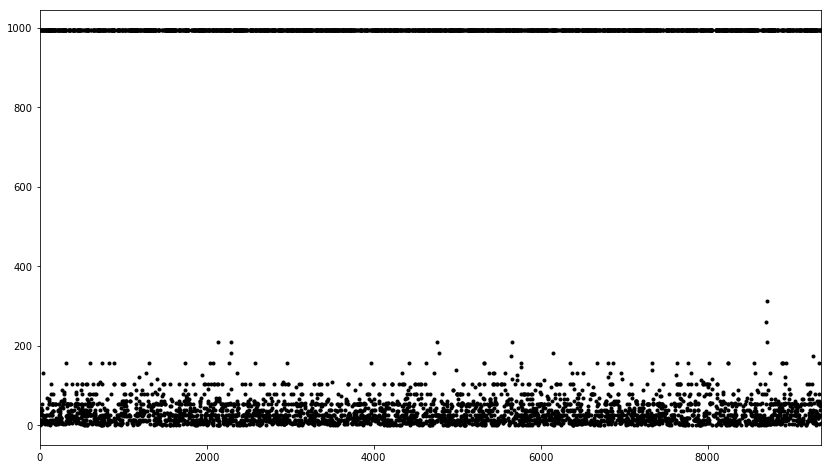

In [41]:
%matplotlib inline
myfile['BFEEDWKS'].plot(style='k.', figsize = (14,8))

In [42]:
#drop women still breastfeeding
myfile = myfile[myfile.BFEEDWKS != 994]
#if never breastfed, set number of weeks equal to 0
myfile.loc[myfile['BFEEDWKS'] == 995, 'BFEEDWKS'] = 0
#drop if no babies born
myfile = myfile.dropna(subset=['NBRNLV_S'])
#drop if baby died or given away for adoption
myfile = myfile[myfile.BPA_BDSCHECK1 == 0]

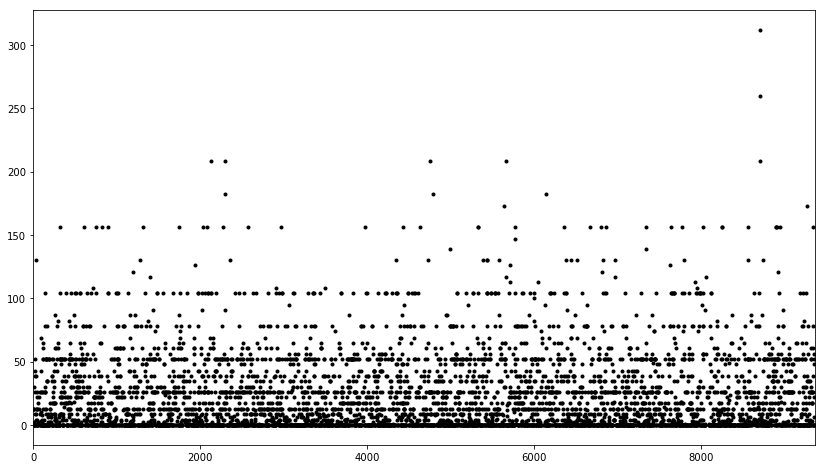

In [43]:
%matplotlib inline
myfile['BFEEDWKS'].plot(style='k.', figsize = (14,8))

In [45]:
df = pd.DataFrame(myfile, columns=['NBRNLV_S', 'NBRNALIV'])
df = df.dropna(subset=['NBRNLV_S']) 
df.loc[df['NBRNLV_S'] != df['NBRNALIV']]
myfile
myfile.loc['PRIORSMK']

,CASEID,PREGORDR,HOWPREG_N,HOWPREG_P,MOSCURRP,NOWPRGDK,PREGEND1,PREGEND2,HOWENDDK,NBRNALIV,...,SECU,SEST,CMINTVW,CMLSTYR,CMJAN3YR,CMJAN4YR,CMJAN5YR,QUARTER,PHASE,INTVWYEAR
0,60418,1,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,4,342,1381,1369,1345,1333,1321,14,1,2015
1,60418,2,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,4,342,1381,1369,1345,1333,1321,14,1,2015
2,60418,3,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,4,342,1381,1369,1345,1333,1321,14,1,2015
4,60420,1,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,1,339,1388,1376,1345,1333,1321,16,1,2015
6,60423,1,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,2,355,1387,1375,1345,1333,1321,16,1,2015
7,60423,2,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,2,355,1387,1375,1345,1333,1321,16,1,2015
9,60426,2,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,3,344,1368,1356,1321,1309,1297,9,1,2013
10,60430,1,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,2,304,1385,1373,1345,1333,1321,15,1,2015
11,60430,2,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,2,304,1385,1373,1345,1333,1321,15,1,2015
14,60434,2,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,1,301,1374,1362,1333,1321,1309,12,1,2014
